### 1- PCA and t-SNE visualization(2D/3D)  of the raw data using  scikit-learn
### Edgar Acuna
#### Dataset: NRLset1
#### June 2021

In [17]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

### Loading the data

In [19]:
df1=pd.read_csv("c://onr2020/NRLset1_part1.csv",header=None)
df2=pd.read_csv("c://onr2020/NRLset1_part2.csv",header=None)
df3=pd.read_csv("c://onr2020/NRLset1_part3.csv",header=None)
df4=pd.read_csv("c://onr2020/NRLset1_part4.csv",header=None)
df5=pd.read_csv("c://onr2020/NRLset1_part5.csv",header=None)
df6=pd.read_csv("c://onr2020/NRLset1_part6.csv",header=None)
df7=pd.read_csv("c://onr2020/NRLset1_part7.csv",header=None)
df8=pd.read_csv("c://onr2020/NRLset1_part8.csv",header=None)
y=pd.read_csv("c://onr2020/labels.csv",header=None)
ys=pd.read_csv("c://onr2020/substrateIDs.csv",header=None)
dfset1=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8],ignore_index=True)
print('Size of the dataframe: {}'.format(dfset1.shape))

Size of the dataframe: (18000, 1701)


The data consist of 18,000 spectra of 40 analytes on 9 substrates taken at 1701 points 

### Ploting the spectra of some analytes in each subtrate

In [20]:
dfset2=dfset1.copy()
dfset2['Analyte']=y
dfset2['substrate']=ys
dfsub1=dfset2[dfset2['substrate']==1]
dfsub1.describe()

0            1            2            3            4  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.020819     0.020874     0.020654     0.020591     0.020882   
std       0.009309     0.009403     0.009487     0.008935     0.009471   
min      -0.016614    -0.010573    -0.011558    -0.013635    -0.009674   
25%       0.014640     0.014601     0.014303     0.014646     0.014460   
50%       0.019492     0.019558     0.019400     0.019520     0.019799   
75%       0.026076     0.025838     0.025841     0.025584     0.026214   
max       0.056315     0.067970     0.062821     0.061099     0.061162   

                 5            6            7            8            9  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.020707     0.020635     0.020631     0.020692     0.020442  ...   
std       0.009033     0.009427     0.009302     0.009586     0.008919  ...   
min      -0.016783    -0.018493    -0.011515    -0.015810    -0.009410  ...   
25%       0.014482     0.014068     0.014396     0.014141     0.014318  ...   
50%       0.019407     0.019444     0.019312     0.019278     0.019183  ...   
75%       0.026140     0.026580     0.025891     0.026391     0.025344  ...   
max       0.065308     0.065978     0.055761     0.071833     0.054516  ...   

              1693         1694         1695         1696         1697  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.024001     0.023715     0.023763     0.023608     0.023562   
std       0.008940     0.008948     0.008976     0.008972     0.008991   
min      -0.014453    -0.008457    -0.017883    -0.010361    -0.012789   
25%       0.017424     0.017582     0.017259     0.017474     0.017139   
50%       0.023397     0.022956     0.023405     0.022873     0.022874   
75%       0.029570     0.029055     0.029416     0.029017     0.029287   
max       0.065511     0.068197     0.065039     0.074588     0.076596   

              1698         1699         1700      Analyte  substrate  
count  2000.000000  2000.000000  2000.000000  2000.000000     2000.0  
mean      0.023705     0.023430     0.024078    20.500000        1.0  
std       0.008752     0.008894     0.009189    11.546283        0.0  
min      -0.018057    -0.017376    -0.009949     1.000000        1.0  
25%       0.017479     0.017105     0.017452    10.750000        1.0  
50%       0.023185     0.022865     0.023643    20.500000        1.0  
75%       0.029329     0.029008     0.029877    30.250000        1.0  
max       0.064978     0.065023     0.067577    40.000000        1.0  

[8 rows x 1703 columns]

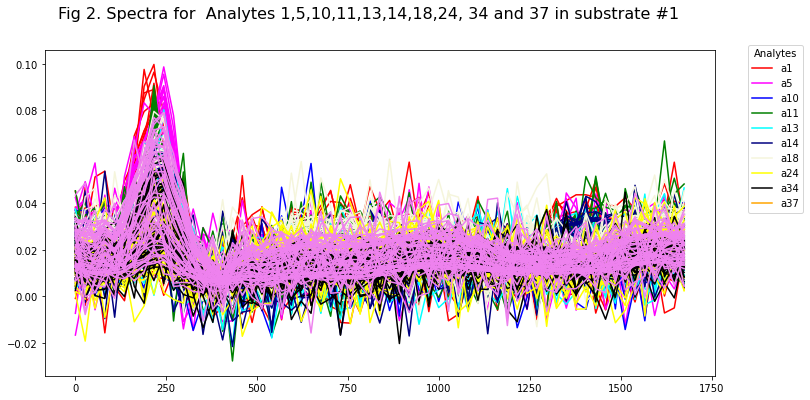

In [21]:
dfsubs1=dfsub1[dfsub1['Analyte']==1].drop(['substrate'], axis=1)
dfsubs5=dfsub1[dfsub1['Analyte']==5].drop(['substrate'], axis=1)
dfsubs10=dfsub1[dfsub1['Analyte']==10].drop(['substrate'], axis=1)
dfsubs11=dfsub1[dfsub1['Analyte']==11].drop(['substrate'], axis=1)
dfsubs13=dfsub1[dfsub1['Analyte']==13].drop(['substrate'], axis=1)
dfsubs14=dfsub1[dfsub1['Analyte']==14].drop(['substrate'], axis=1)
dfsubs18=dfsub1[dfsub1['Analyte']==18].drop(['substrate'], axis=1)
dfsubs24=dfsub1[dfsub1['Analyte']==24].drop(['substrate'], axis=1)
dfsubs34=dfsub1[dfsub1['Analyte']==34].drop(['substrate'], axis=1)
dfsubs37=dfsub1[dfsub1['Analyte']==37].drop(['substrate'], axis=1)
fig,ax = plt.subplots(figsize=[12,6])
fig.suptitle('Fig 2. Spectra for  Analytes 1,5,10,11,13,14,18,24, 34 and 37 in substrate #1', fontsize=16)
#spectra=range(0,1701,1)
spectra=range(0,1701,27)
#print(dfsub1.index)
for name in dfsubs1.index:
    p1=ax.plot(spectra,dfset1.iloc[name,spectra],c='red')  
for name in dfsubs5.index:
    p2=ax.plot(spectra,dfset1.iloc[name,spectra],c='magenta')   
for name in dfsubs10.index:
    p3=ax.plot(spectra,dfset1.iloc[name,spectra],c='blue')
for name in dfsubs11.index:
    p4=ax.plot(spectra,dfset1.iloc[name,spectra],c='green')
for name in dfsubs13.index:
    p5=ax.plot(spectra,dfset1.iloc[name,spectra],c='cyan')
for name in dfsubs14.index:
    p6=ax.plot(spectra,dfset1.iloc[name,spectra],c='navy')
for name in dfsubs18.index:
    p7=ax.plot(spectra,dfset1.iloc[name,spectra],c='beige')
for name in dfsubs24.index:
    p8=ax.plot(spectra,dfset1.iloc[name,spectra],c='yellow')
for name in dfsubs34.index:
    p9=ax.plot(spectra,dfset1.iloc[name,spectra],c='black')
for name in dfsubs37.index:
    p10=ax.plot(spectra,dfset1.iloc[name,spectra],c='violet')
ax.legend([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10],\
          labels=['a1','a5','a10','a11','a13','a14','a18','a24', 'a34','a37'],loc=(1.05,.5), markerscale=50, title="Analytes")
leg=ax.get_legend()
leg.legendHandles[0].set_color('red')
leg.legendHandles[1].set_color('magenta')
leg.legendHandles[2].set_color('blue')
leg.legendHandles[3].set_color('green')
leg.legendHandles[4].set_color('cyan')
leg.legendHandles[5].set_color('navy')
leg.legendHandles[6].set_color('beige')
leg.legendHandles[7].set_color('yellow')
leg.legendHandles[8].set_color('black')
leg.legendHandles[9].set_color('orange')

### Plotting Analyte's #1 spectra in all nine substrates

In [22]:
dfset2=dfset1.copy()
dfset2['Analyte']=y
dfset2['substrate']=ys
df1=dfset2[dfset2['Analyte']==1]
df1.head()

0         1         2         3         4         5         6  \
45   0.060324  0.045494  0.047940  0.062187  0.051952  0.057706  0.083892   
131  0.039087  0.044316  0.039012  0.040163  0.062475  0.057889  0.048345   
213  0.067057  0.067940  0.069780  0.067335  0.068445  0.067769  0.066817   
223  0.020585  0.023038  0.024709  0.025375  0.025402  0.025502  0.025661   
230  0.024734  0.024058  0.031828  0.030921  0.031082  0.030491  0.030398   

            7         8         9  ...      1693      1694      1695  \
45   0.053137  0.045065  0.067136  ...  0.067685  0.069130  0.078906   
131  0.066021  0.066282  0.055886  ...  0.055901  0.055963  0.053912   
213  0.068663  0.066910  0.065060  ...  0.279400  0.280120  0.278790   
223  0.025624  0.025637  0.025628  ...  0.033955  0.033818  0.033772   
230  0.035592  0.031890  0.033417  ...  0.033224  0.030698  0.035966   

         1696      1697      1698      1699      1700  Analyte  substrate  
45   0.062101  0.062506  0.080096  0.066638  0.080473        1          2  
131  0.061405  0.042810  0.045681  0.074728  0.059660        1          5  
213  0.277680  0.277930  0.277420  0.275860  0.274460        1          6  
223  0.033876  0.034057  0.034107  0.034069  0.034953        1          5  
230  0.034079  0.033396  0.029453  0.028487  0.036445        1          1  

[5 rows x 1703 columns]

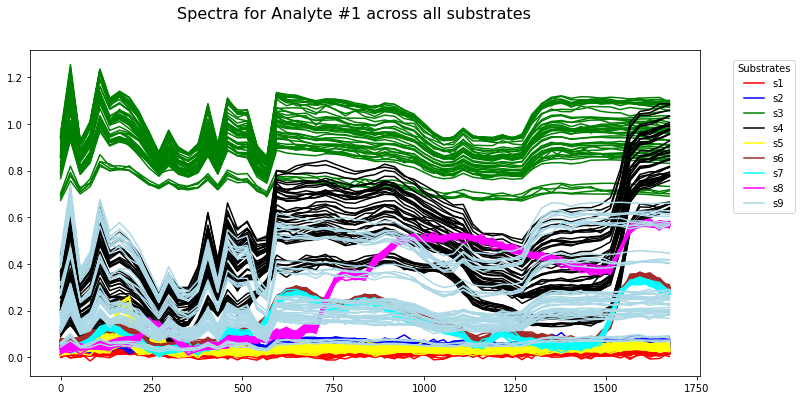

In [23]:
dfs1=df1[df1['substrate']==1].drop(['Analyte'], axis=1)
dfs2=df1[df1['substrate']==2].drop(['Analyte'], axis=1)
dfs3=df1[df1['substrate']==3].drop(['Analyte'], axis=1)
dfs4=df1[df1['substrate']==4].drop(['Analyte'], axis=1)
dfs5=df1[df1['substrate']==5].drop(['Analyte'], axis=1)
dfs6=df1[df1['substrate']==6].drop(['Analyte'], axis=1)
dfs7=df1[df1['substrate']==7].drop(['Analyte'], axis=1)
dfs8=df1[df1['substrate']==8].drop(['Analyte'], axis=1)
dfs9=df1[df1['substrate']==9].drop(['Analyte'], axis=1)
fig,ax = plt.subplots(figsize=[12,6])
fig.suptitle('Spectra for Analyte #1 across all substrates', fontsize=16)
ax.set_prop_cycle('color',['red', 'blue', 'green','black','yellow','brown','cyan','magenta','lightblue'])
#spectra=range(0,600,1)
spectra=range(0,1701,27)
#print(dfs1.index)
for name in dfs1.index:
    p1=ax.plot(spectra,dfset1.iloc[name,spectra],c='red')   
for name in dfs2.index:
    p2=ax.plot(spectra,dfset1.iloc[name,spectra],c='blue')
for name in dfs3.index:
    p3=ax.plot(spectra,dfset1.iloc[name,spectra],c='green')
for name in dfs4.index:
    p4=ax.plot(spectra,dfset1.iloc[name,spectra],c='black')
for name in dfs5.index:
    p5=ax.plot(spectra,dfset1.iloc[name,spectra],c='yellow')
for name in dfs6.index:
    p6=ax.plot(spectra,dfset1.iloc[name,spectra],c='brown')
for name in dfs7.index:
    p7=ax.plot(spectra,dfset1.iloc[name,spectra],c='cyan')
for name in dfs8.index:
    p8=ax.plot(spectra,dfset1.iloc[name,spectra],c='magenta')
for name in dfs9.index:
    p9=ax.plot(spectra,dfset1.iloc[name,spectra],c='lightblue')
ax.legend([p1,p2,p3,p4,p5,p6,p7,p8,p9],labels=['s1','s2','s3','s4','s5','s6','s7','s8','s9'],loc=(1.05,.5), markerscale=50, title="Substrates")
leg=ax.get_legend()
leg.legendHandles[0].set_color('red')
leg.legendHandles[1].set_color('blue')
leg.legendHandles[2].set_color('green')
leg.legendHandles[3].set_color('black')
leg.legendHandles[4].set_color('yellow')
leg.legendHandles[5].set_color('brown')
leg.legendHandles[6].set_color('cyan')
leg.legendHandles[7].set_color('magenta')
leg.legendHandles[8].set_color('lightblue')

### Plotting the spectra for the Analyte #13 in all nine substrates

In [24]:
dfset13=dfset1.copy()
dfset13['Analyte']=y
dfset13['substrate']=ys
df13=dfset13[dfset13['Analyte']==13]
df13.head()

0         1         2         3         4         5         6  \
51   0.732810  0.732900  0.732480  0.731500  0.733180  0.735040  0.735850   
72   0.041356  0.042846  0.038162  0.043997  0.042416  0.047014  0.043797   
115  0.049461  0.046698  0.041275  0.033099  0.043226  0.043192  0.034792   
118  0.028407  0.028321  0.028239  0.028161  0.028080  0.027997  0.027917   
144  0.289320  0.292740  0.293540  0.290940  0.291330  0.288580  0.286470   

            7         8         9  ...      1693      1694      1695  \
51   0.736970  0.738220  0.739210  ...  0.656540  0.656450  0.656370   
72   0.038665  0.045528  0.036166  ...  0.568250  0.570780  0.570620   
115  0.051749  0.038943  0.036247  ...  0.575380  0.573030  0.574080   
118  0.027837  0.027756  0.027666  ...  0.025982  0.025968  0.025953   
144  0.283900  0.286400  0.290180  ...  0.717490  0.719220  0.716130   

         1696      1697      1698      1699      1700  Analyte  substrate  
51   0.656280  0.656200  0.656120  0.656040  0.655960       13          3  
72   0.571400  0.574290  0.564580  0.571380  0.577260       13          8  
115  0.573990  0.572910  0.567650  0.568100  0.565500       13          8  
118  0.025936  0.025918  0.025901  0.025883  0.025863       13          1  
144  0.716850  0.725420  0.715970  0.717680  0.714880       13          4  

[5 rows x 1703 columns]

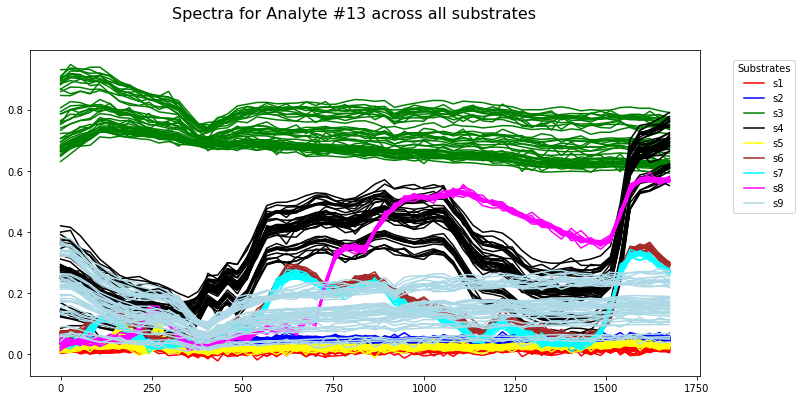

In [25]:
dfs1=df13[df13['substrate']==1].drop(['Analyte'], axis=1)
dfs2=df13[df13['substrate']==2].drop(['Analyte'], axis=1)
dfs3=df13[df13['substrate']==3].drop(['Analyte'], axis=1)
dfs4=df13[df13['substrate']==4].drop(['Analyte'], axis=1)
dfs5=df13[df13['substrate']==5].drop(['Analyte'], axis=1)
dfs6=df13[df13['substrate']==6].drop(['Analyte'], axis=1)
dfs7=df13[df13['substrate']==7].drop(['Analyte'], axis=1)
dfs8=df13[df13['substrate']==8].drop(['Analyte'], axis=1)
dfs9=df13[df13['substrate']==9].drop(['Analyte'], axis=1)
fig,ax = plt.subplots(figsize=[12,6])
spectra=range(0,1701,27)
fig.suptitle('Spectra for Analyte #13 across all substrates', fontsize=16)
for name in dfs1.index:
    p1=ax.plot(spectra,dfset13.iloc[name,spectra],c='red')   
for name in dfs2.index:
    p2=ax.plot(spectra,dfset13.iloc[name,spectra],c='blue')    
for name in dfs3.index:
    p3=ax.plot(spectra,dfset13.iloc[name,spectra],c='green')
for name in dfs4.index:
    p4=ax.plot(spectra,dfset13.iloc[name,spectra],c='black')
for name in dfs5.index:
    p5=ax.plot(spectra,dfset13.iloc[name,spectra],c='yellow')
for name in dfs6.index:
    p6=ax.plot(spectra,dfset13.iloc[name,spectra],c='brown')
for name in dfs7.index:
    p7=ax.plot(spectra,dfset13.iloc[name,spectra],c='cyan')
for name in dfs8.index:
    p8=ax.plot(spectra,dfset13.iloc[name,spectra],c='magenta')
for name in dfs9.index:
    p9=ax.plot(spectra,dfset13.iloc[name,spectra],c='lightblue')
ax.legend([p1,p2,p3,p4,p5,p6,p7,p8,p9],labels=['s1','s2','s3','s4','s5','s6','s7','s8','s9'],loc=(1.05,.5), markerscale=50, title="Substrates")
leg=ax.get_legend()
leg.legendHandles[0].set_color('red')
leg.legendHandles[1].set_color('blue')
leg.legendHandles[2].set_color('green')
leg.legendHandles[3].set_color('black')
leg.legendHandles[4].set_color('yellow')
leg.legendHandles[5].set_color('brown')
leg.legendHandles[6].set_color('cyan')
leg.legendHandles[7].set_color('magenta')
leg.legendHandles[8].set_color('lightblue')


### Plotting the spectra for the Analyte #34 in all nine substrates

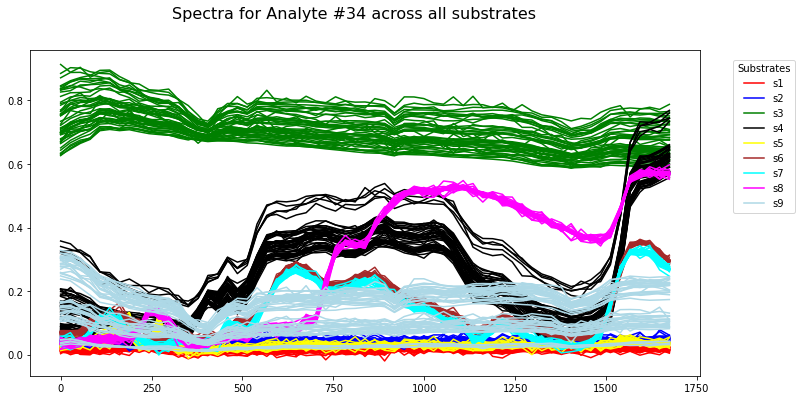

In [26]:
dfset34=dfset1.copy()
dfset34['Analyte']=y
dfset34['substrate']=ys
df34=dfset34[dfset34['Analyte']==34]
dfs1=df34[df34['substrate']==1].drop(['Analyte'], axis=1)
dfs2=df34[df34['substrate']==2].drop(['Analyte'], axis=1)
dfs3=df34[df34['substrate']==3].drop(['Analyte'], axis=1)
dfs4=df34[df34['substrate']==4].drop(['Analyte'], axis=1)
dfs5=df34[df34['substrate']==5].drop(['Analyte'], axis=1)
dfs6=df34[df34['substrate']==6].drop(['Analyte'], axis=1)
dfs7=df34[df34['substrate']==7].drop(['Analyte'], axis=1)
dfs8=df34[df34['substrate']==8].drop(['Analyte'], axis=1)
dfs9=df34[df34['substrate']==9].drop(['Analyte'], axis=1)
fig,ax = plt.subplots(figsize=[12,6])
spectra=range(0,1701,27)
fig.suptitle('Spectra for Analyte #34 across all substrates', fontsize=16)
for name in dfs1.index:
    p1=ax.plot(spectra,dfset34.iloc[name,spectra],c='red')   
for name in dfs2.index:
    p2=ax.plot(spectra,dfset34.iloc[name,spectra],c='blue')    
for name in dfs3.index:
    p3=ax.plot(spectra,dfset34.iloc[name,spectra],c='green')
for name in dfs4.index:
    p4=ax.plot(spectra,dfset34.iloc[name,spectra],c='black')
for name in dfs5.index:
    p5=ax.plot(spectra,dfset34.iloc[name,spectra],c='yellow')
for name in dfs6.index:
    p6=ax.plot(spectra,dfset34.iloc[name,spectra],c='brown')
for name in dfs7.index:
    p7=ax.plot(spectra,dfset34.iloc[name,spectra],c='cyan')
for name in dfs8.index:
    p8=ax.plot(spectra,dfset34.iloc[name,spectra],c='magenta')
for name in dfs9.index:
    p9=ax.plot(spectra,dfset34.iloc[name,spectra],c='lightblue')
ax.legend([p1,p2,p3,p4,p5,p6,p7,p8,p9],labels=['s1','s2','s3','s4','s5','s6','s7','s8','s9'],loc=(1.05,.5), markerscale=50, title="Substrates")
leg=ax.get_legend()
leg.legendHandles[0].set_color('red')
leg.legendHandles[1].set_color('blue')
leg.legendHandles[2].set_color('green')
leg.legendHandles[3].set_color('black')
leg.legendHandles[4].set_color('yellow')
leg.legendHandles[5].set_color('brown')
leg.legendHandles[6].set_color('cyan')
leg.legendHandles[7].set_color('magenta')
leg.legendHandles[8].set_color('lightblue')


### PCA visualization in 2D 

In [27]:
#hard substrates only
#dfsub1=dfset2[dfset2['substrate']==1].drop(['Analyte'], axis=1)
#dfsub2=dfset2[dfset2['substrate']==2].drop(['Analyte'], axis=1)
#dfsub5=dfset2[dfset2['substrate']==5].drop(['Analyte'], axis=1)
#dfsub6=dfset2[dfset2['substrate']==6].drop(['Analyte'], axis=1)
#dfsub7=dfset2[dfset2['substrate']==7].drop(['Analyte'], axis=1)
#dfsub8=dfset2[dfset2['substrate']==8].drop(['Analyte'], axis=1)
#subdf=[dfsub1,dfsub2,dfsub5,dfsub6,dfsub7,dfsub8]
#hard_subs=pd.concat(subdf)
#hard_subs.head()

In [28]:
#All the substrates
from sklearn.decomposition import PCA
#Computing up to first 3 PC
pca = PCA(n_components=3)
pca_result = pca.fit_transform(dfset1.iloc[:,0:1071])
#pca_result = pca.fit_transform(hard_subs.iloc[:,0:1701])
dfset1['pca-one'] = pca_result[:,0]
dfset1['pca-two'] = pca_result[:,1] 
dfset1['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative explained variation by the 3PCs: {}'.format(pca.explained_variance_ratio_.cumsum()))

Explained variation per principal component: [0.90799857 0.06216618 0.0210442 ]
Cumulative explained variation by the 3PCs: [0.90799857 0.97016474 0.99120894]


#### The first 2 PCs explain 97.0 percent fo the Total Variation

In [29]:
#dfset1=pd.DataFrame(dfset1)
dfset1['Analyte']=y
dfset1['substrate']=ys
#hard_subs['subtrate']=ys

In [30]:
dfset1.head()

0         1         2         3         4         5         6  \
0  0.041418  0.041621  0.042198  0.042688  0.042924  0.042274  0.042542   
1  0.694710  0.695840  0.697180  0.706530  0.703970  0.709130  0.711480   
2  0.048978  0.048432  0.047685  0.047086  0.046811  0.046752  0.046624   
3  0.039762  0.039495  0.038982  0.038339  0.037769  0.037301  0.036799   
4  0.022387  0.022508  0.022091  0.023054  0.023010  0.022740  0.023889   

          7         8         9  ...      1696      1697      1698      1699  \
0  0.042663  0.042715  0.042664  ...  0.053325  0.053364  0.053356  0.053500   
1  0.711330  0.712370  0.712980  ...  0.755760  0.752910  0.755320  0.753030   
2  0.046443  0.046241  0.045999  ...  0.256580  0.255700  0.254800  0.254160   
3  0.036316  0.035921  0.035612  ...  0.253720  0.252880  0.251970  0.251070   
4  0.023936  0.023464  0.024810  ...  0.025714  0.025306  0.025062  0.023609   

       1700    pca-one   pca-two  pca-three  Analyte  substrate  
0  0.055986  -5.248615 -1.277652  -0.329123       26          2  
1  0.753230  18.705668 -1.500796  -0.406780       18          3  
2  0.257110  -2.131548  0.200143   1.376747        8          7  
3  0.250190  -2.526400  0.102566   1.315469       32          7  
4  0.023901  -6.044686 -1.448290  -0.513806       30          1  

[5 rows x 1706 columns]

In [31]:
dfset1.shape

(18000, 1706)

### 2D visualization of the raw data identified by substrate

In [32]:
#Visualization all the 9 subtrates
rndperm = np.random.permutation(dfset1.shape[0])
from plotnine import *
chart = ggplot(dfset1.loc[rndperm[:18000],:], aes(x='pca-one', y='pca-two', color='substrate') ) \
        + geom_point(size=3,alpha=0.6) \
        + ggtitle("First and Second Principal Components colored by Substrate")
chart

ModuleNotFoundError: No module named 'plotnine'

The substrates 3,4,9 appear are large clusters

###  3D visualization of the raw data using PCA

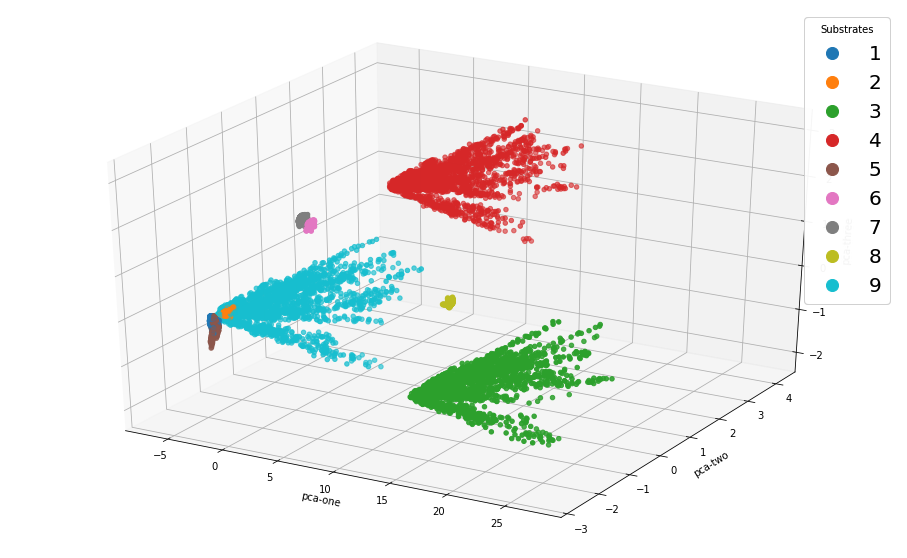

In [59]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
scatter=ax.scatter(
    xs=dfset1.loc[rndperm,:]["pca-one"], 
    ys=dfset1.loc[rndperm,:]["pca-two"], 
    zs=dfset1.loc[rndperm,:]["pca-three"], 
    c=dfset1.loc[rndperm,:]["substrate"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
legend1=ax.legend(*scatter.legend_elements(), loc="best", title="Substrates",markerscale=2,fontsize=20)
ax.add_artist(legend1)
plt.show()

In [60]:
import plotly.express as px
fig=px.scatter_3d(dfset1, x="pca-one", y="pca-two", z="pca-three",color='substrate')
fig.show()

### T-SNE visualization in 2D (Only 10,000 data points are used)

In [61]:
import time

from sklearn.manifold import TSNE

n_sne = 10000
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=35, n_iter=300)
tsne_results = tsne.fit_transform(dfset1.iloc[rndperm[:n_sne],0:1701])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 10000 samples in 3.643s...
[t-SNE] Computed neighbors for 10000 samples in 49.392s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.062704
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.972008
[t-SNE] KL divergence after 300 iterations: 2.186444
t-SNE done! Time elapsed

In [62]:
df_tsne = dfset1.iloc[rndperm[:n_sne],0:1706].copy()
#df_tsne.head()

In [63]:
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]
#df_tsne['z-tsne'] = tsne_results[:,2]
#df_tsne.head()

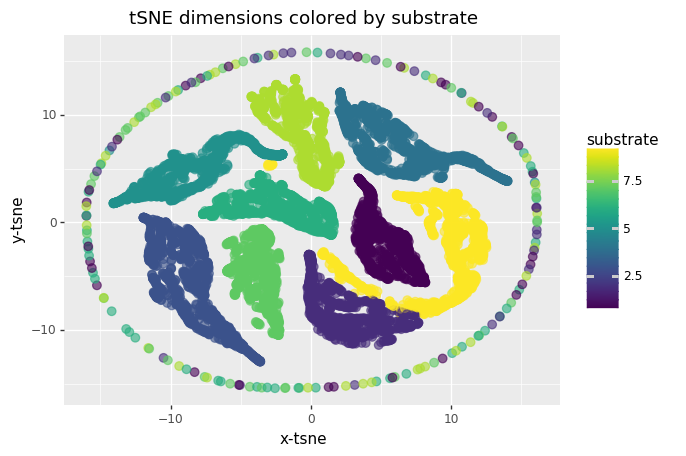

<ggplot: (-9223371926060626704)>

In [64]:
chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='substrate') ) \
        + geom_point(size=3,alpha=0.6) \
        + ggtitle("tSNE dimensions colored by substrate")
chart

### Clearly we can notice the nine subtrates. The outer circle may be due to the curse of deimesnionality effect.

### T-SNE visualization in 3D

In [65]:
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=35, n_iter=300)
tsne_results = tsne.fit_transform(dfset1.iloc[rndperm[:n_sne],0:1701])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 10000 samples in 3.871s...
[t-SNE] Computed neighbors for 10000 samples in 49.173s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.062704
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.735229
[t-SNE] KL divergence after 300 iterations: 1.925658
t-SNE done! Time elapsed

In [66]:
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]
df_tsne['z-tsne'] = tsne_results[:,2]
print(df_tsne.shape)

(10000, 1709)


In [67]:
#df_tsne = dfset1.iloc[rndperm[:n_sne],0:1706].copy()
df_tsne.head()

0         1         2         3         4         5         6  \
12768  0.040602  0.040346  0.039844  0.039212  0.038651  0.038195  0.037706   
8654   0.038448  0.042213  0.029620  0.043821  0.037241  0.037930  0.037733   
16253  0.016541  0.016815  0.017010  0.016769  0.016352  0.016219  0.016258   
17491  0.026997  0.028477  0.026110  0.030188  0.032853  0.032016  0.032835   
5478   0.040535  0.042079  0.040880  0.039906  0.040341  0.040541  0.039783   

              7         8         9  ...      1699      1700   pca-one  \
12768  0.037234  0.036860  0.036569  ...  0.251000  0.251770 -2.354843   
8654   0.034140  0.025006  0.039243  ...  0.249020  0.253290 -2.480511   
16253  0.016259  0.016396  0.016642  ...  0.030952  0.031368 -5.898107   
17491  0.032021  0.031395  0.029714  ...  0.029521  0.030365 -5.915529   
5478   0.041400  0.040721  0.038856  ...  0.571170  0.572960 -0.454034   

        pca-two  pca-three  Analyte  substrate    x-tsne    y-tsne    z-tsne  
12768  0.178738   1.366787       16          7 -3.998164  1.352456  0.176757  
8654   0.141700   1.290860       22          7 -1.605019 -1.781372  0.492672  
16253 -1.403963  -0.463131       25          5 -1.824932  5.573556 -1.019317  
17491 -1.505244  -0.554642        9          1 -1.991582 -7.562683 -0.172506  
5478   4.129207  -1.995953       40          8 -3.884153  0.663750 -4.202349  

[5 rows x 1709 columns]

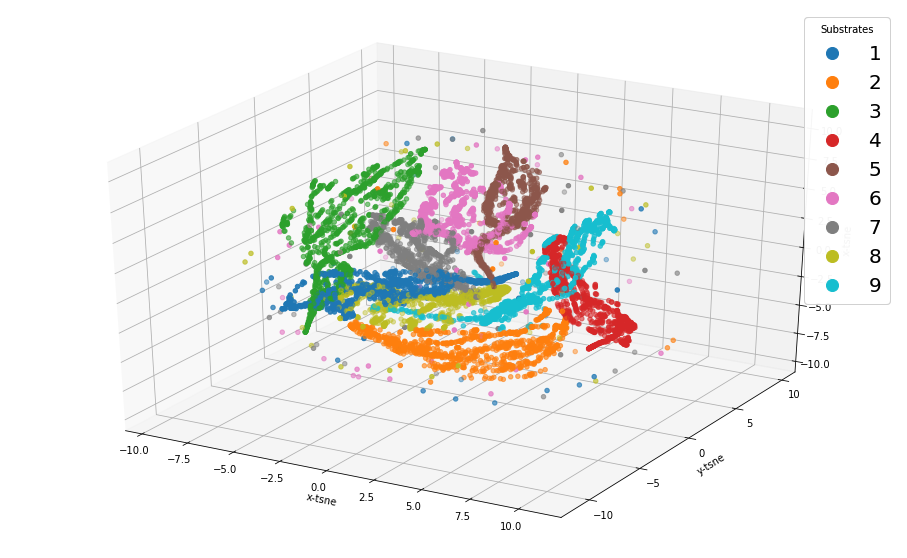

In [68]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_tsne['x-tsne'], 
    ys=df_tsne['y-tsne'], 
    zs=df_tsne["z-tsne"], 
    c=df_tsne["substrate"], 
    cmap='tab10'
)
ax.set_xlabel('x-tsne')
ax.set_ylabel('y-tsne')
ax.set_zlabel('x-tsne')
legend1=ax.legend(*scatter.legend_elements(), loc="best", title="Substrates",markerscale=2,fontsize=20)
ax.add_artist(legend1)
plt.show()

### Still we can notice the outer cricle

In [69]:
import plotly.express as px
fig=px.scatter_3d(df_tsne, x="x-tsne", y="y-tsne", z="z-tsne",color='substrate',width=1000, height=1000)
fig.show()

### Applying t-SNE after PCA in 2D

In [70]:
pca_100 = PCA(n_components=100)
pca_result_100 = pca_100.fit_transform(dfset1.iloc[:,0:1701])
print('Cumulative explained variation for 100 principal components: {}'.format(np.sum(pca_100.explained_variance_ratio_)))

Cumulative explained variation for 100 principal components: 0.9995822588183433


#### Only 100 PC's  will be used

In [71]:
n_sne = 10000

time_start = time.time()

tsne = TSNE(n_components=2,verbose=1, perplexity=35, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_100[rndperm[:n_sne]])

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.199s...
[t-SNE] Computed neighbors for 10000 samples in 1.312s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.051491
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.376740
[t-SNE] KL divergence after 300 iterations: 2.199715
t-SNE done! Time elapsed:

In [72]:
df_tsne = None
df_tsne = dfset1.loc[rndperm[:n_sne],:].copy()
#df_tsne.head()

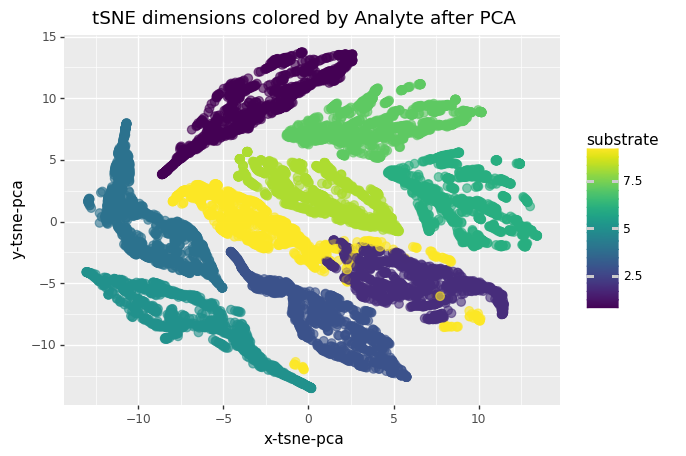

<ggplot: (-9223371926060638924)>

In [73]:
df_tsne['x-tsne-pca'] = tsne_pca_results[:,0]
df_tsne['y-tsne-pca'] = tsne_pca_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne-pca', y='y-tsne-pca', color='substrate') ) \
        + geom_point(size=3,alpha=0.6) \
        + ggtitle("tSNE dimensions colored by Analyte after PCA")
chart

#### The outer circle has dissapeared because diensionality reduction was applied

### Applying t-SNE after PCA in 3D

In [74]:
n_sne = 10000

time_start = time.time()

tsne = TSNE(n_components=3, verbose=1, perplexity=35, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_100[rndperm[:n_sne]])

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.182s...
[t-SNE] Computed neighbors for 10000 samples in 1.340s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.051491
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.998932
[t-SNE] KL divergence after 300 iterations: 1.872114
t-SNE done! Time elapsed:

In [75]:
df_tsne = None
df_tsne = dfset1.loc[rndperm[:n_sne],:].copy()
#df_tsne.head()

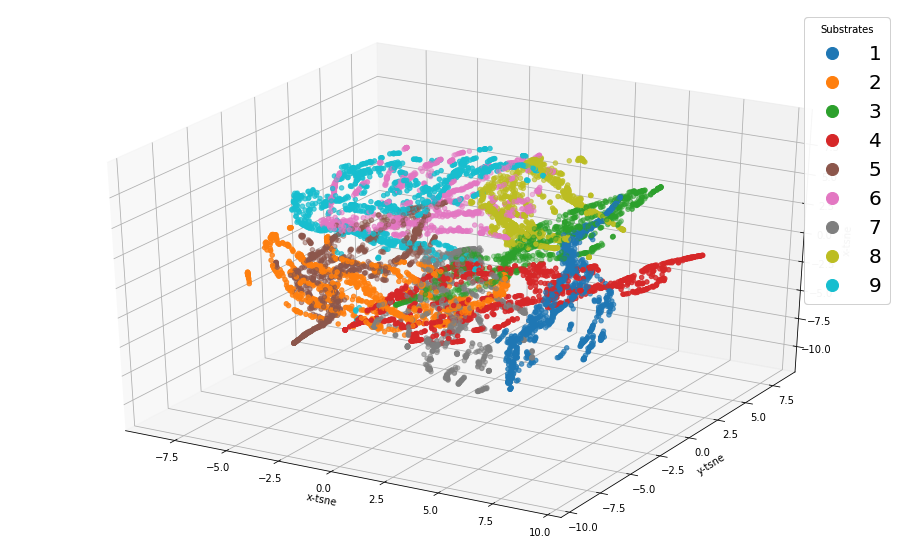

In [76]:
df_tsne['x-tsne-pca'] = tsne_pca_results[:,0]
df_tsne['y-tsne-pca'] = tsne_pca_results[:,1]
df_tsne['z-tsne-pca'] = tsne_pca_results[:,2]
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_tsne["x-tsne-pca"], 
    ys=df_tsne['y-tsne-pca'], 
    zs=df_tsne["z-tsne-pca"], 
    c=df_tsne["substrate"], 
    cmap='tab10'
)
ax.set_xlabel('x-tsne')
ax.set_ylabel('y-tsne')
ax.set_zlabel('x-tsne')
legend1=ax.legend(*scatter.legend_elements(), loc="best", title="Substrates",markerscale=2,fontsize=20)
ax.add_artist(legend1)
plt.show()

In [77]:
import plotly.express as px
fig=px.scatter_3d(df_tsne, x="x-tsne-pca", y="y-tsne-pca", z="z-tsne-pca",color='substrate',width=1000, height=1000)
fig.show()